In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('NYC_subway_traffic_2017-2021.csv')
df

,Unique ID,Datetime,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits
0,1,2017-02-04 04:00:00,103 St,R180,Lexington Av,6,6,Uptown Bronx,Downtown,IRT,Subway,M,East Harlem,40.790600,-73.947478,403.0,222.0
1,2,2017-02-04 04:00:00,103 St,R191,Broadway - 7Av,1,1,Uptown Bronx,Downtown,IRT,Subway,M,Upper West Side,40.799446,-73.968379,119.0,145.0
2,3,2017-02-04 04:00:00,103 St,R314,8th Av - Fulton St,BC,BC,Uptown Bronx,Downtown Brooklyn,IND,Subway,M,Upper West Side,40.796092,-73.961454,55.0,81.0
3,10,2017-02-04 04:00:00,111 St,R355,Liberty Av,A,A,Manhattan,Lefferts Blvd,IND,Elevated,Q,South Ozone Park/Howard Beach,40.684331,-73.832163,156.0,30.0
4,11,2017-02-04 04:00:00,116 St,R182,Lexington Av,6,6,Uptown Bronx,Downtown,IRT,Subway,M,East Harlem,40.798629,-73.941617,495.0,303.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4589375,113,2021-08-13 20:00:00,5 Av/53 St,R015,Queens Blvd,EM,EM,Queens,Downtown Brooklyn,IND,Subway,M,Clinton/Chelsea,40.760167,-73.975224,1182.0,646.0
4589376,114,2021-08-13 20:00:00,5 Av/59 St,R079,Astoria,NQR,NWR,Queens,Downtown Brooklyn,BMT,Subway,M,Upper West Side,40.764811,-73.973347,1274.0,445.0
4589377,310,2021-08-13 20:00:00,Fulton St,R028,"Clark St, Lexington Av",2345ACJZ,2345,Uptown Bronx Uptown Bronx,Downtown Brooklyn Downtown Brooklyn,IRT,Subway,M,Financial District,40.709892,-74.008040,433.0,549.0
4589378,311,2021-08-13 20:00:00,Fulton St,R028,Jamaica,ACJZ2345,JZ,Brooklyn,Broad St,BMT,Subway,M,Financial District,40.710374,-74.007582,491.0,844.0


In [3]:
new_df = df.copy()
new_df = new_df[['Unique ID','Datetime','Division','Structure','Borough','Neighborhood','Entries','Exits']]
new_df

,Unique ID,Datetime,Division,Structure,Borough,Neighborhood,Entries,Exits
0,1,2017-02-04 04:00:00,IRT,Subway,M,East Harlem,403.0,222.0
1,2,2017-02-04 04:00:00,IRT,Subway,M,Upper West Side,119.0,145.0
2,3,2017-02-04 04:00:00,IND,Subway,M,Upper West Side,55.0,81.0
3,10,2017-02-04 04:00:00,IND,Elevated,Q,South Ozone Park/Howard Beach,156.0,30.0
4,11,2017-02-04 04:00:00,IRT,Subway,M,East Harlem,495.0,303.0
...,...,...,...,...,...,...,...,...
4589375,113,2021-08-13 20:00:00,IND,Subway,M,Clinton/Chelsea,1182.0,646.0
4589376,114,2021-08-13 20:00:00,BMT,Subway,M,Upper West Side,1274.0,445.0
4589377,310,2021-08-13 20:00:00,IRT,Subway,M,Financial District,433.0,549.0
4589378,311,2021-08-13 20:00:00,BMT,Subway,M,Financial District,491.0,844.0


In [4]:
new_df['Datetime'] = pd.to_datetime(new_df['Datetime'])
new_df['Datetime_formatted'] = new_df['Datetime'].dt.strftime('%Y-%m-%d %H')
new_df['Datetime_formatted'] = pd.to_datetime(new_df['Datetime_formatted'])
new_df['Year'] = new_df['Datetime_formatted'].dt.year
new_df['Month'] = new_df['Datetime_formatted'].dt.month
new_df['Day'] = new_df['Datetime_formatted'].dt.day
new_df['Hour'] = new_df['Datetime_formatted'].dt.hour
working_df = new_df.copy()
working_df

,Unique ID,Datetime,Division,Structure,Borough,Neighborhood,Entries,Exits,Datetime_formatted,Year,Month,Day,Hour
0,1,2017-02-04 04:00:00,IRT,Subway,M,East Harlem,403.0,222.0,2017-02-04 04:00:00,2017,2,4,4
1,2,2017-02-04 04:00:00,IRT,Subway,M,Upper West Side,119.0,145.0,2017-02-04 04:00:00,2017,2,4,4
2,3,2017-02-04 04:00:00,IND,Subway,M,Upper West Side,55.0,81.0,2017-02-04 04:00:00,2017,2,4,4
3,10,2017-02-04 04:00:00,IND,Elevated,Q,South Ozone Park/Howard Beach,156.0,30.0,2017-02-04 04:00:00,2017,2,4,4
4,11,2017-02-04 04:00:00,IRT,Subway,M,East Harlem,495.0,303.0,2017-02-04 04:00:00,2017,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4589375,113,2021-08-13 20:00:00,IND,Subway,M,Clinton/Chelsea,1182.0,646.0,2021-08-13 20:00:00,2021,8,13,20
4589376,114,2021-08-13 20:00:00,BMT,Subway,M,Upper West Side,1274.0,445.0,2021-08-13 20:00:00,2021,8,13,20
4589377,310,2021-08-13 20:00:00,IRT,Subway,M,Financial District,433.0,549.0,2021-08-13 20:00:00,2021,8,13,20
4589378,311,2021-08-13 20:00:00,BMT,Subway,M,Financial District,491.0,844.0,2021-08-13 20:00:00,2021,8,13,20


In [5]:
working_df.loc[:, 'Total'] = working_df['Entries'] + working_df['Exits']
working_df.loc[:, 'Netflow'] = working_df['Entries'] - working_df['Exits']
working_df.reset_index(drop=True, inplace=True)
working_df

,Unique ID,Datetime,Division,Structure,Borough,Neighborhood,Entries,Exits,Datetime_formatted,Year,Month,Day,Hour,Total,Netflow
0,1,2017-02-04 04:00:00,IRT,Subway,M,East Harlem,403.0,222.0,2017-02-04 04:00:00,2017,2,4,4,625.0,181.0
1,2,2017-02-04 04:00:00,IRT,Subway,M,Upper West Side,119.0,145.0,2017-02-04 04:00:00,2017,2,4,4,264.0,-26.0
2,3,2017-02-04 04:00:00,IND,Subway,M,Upper West Side,55.0,81.0,2017-02-04 04:00:00,2017,2,4,4,136.0,-26.0
3,10,2017-02-04 04:00:00,IND,Elevated,Q,South Ozone Park/Howard Beach,156.0,30.0,2017-02-04 04:00:00,2017,2,4,4,186.0,126.0
4,11,2017-02-04 04:00:00,IRT,Subway,M,East Harlem,495.0,303.0,2017-02-04 04:00:00,2017,2,4,4,798.0,192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4589375,113,2021-08-13 20:00:00,IND,Subway,M,Clinton/Chelsea,1182.0,646.0,2021-08-13 20:00:00,2021,8,13,20,1828.0,536.0
4589376,114,2021-08-13 20:00:00,BMT,Subway,M,Upper West Side,1274.0,445.0,2021-08-13 20:00:00,2021,8,13,20,1719.0,829.0
4589377,310,2021-08-13 20:00:00,IRT,Subway,M,Financial District,433.0,549.0,2021-08-13 20:00:00,2021,8,13,20,982.0,-116.0
4589378,311,2021-08-13 20:00:00,BMT,Subway,M,Financial District,491.0,844.0,2021-08-13 20:00:00,2021,8,13,20,1335.0,-353.0


In [6]:
def filter_by_column(working_df,column_name,value):
  result = working_df.copy()
  return result[result[column_name]==value]

def aggregate_daily_traffic(working_df):
  daily_df = working_df.groupby(['Year','Month','Day']).agg({
      'Total': 'sum',
      'Netflow': 'mean',
  })
  daily_df = daily_df.reset_index()  # Bring groupby columns into DataFrame columns

  daily_df['Year'] = daily_df['Year'].astype(int)
  daily_df['Month'] = daily_df['Month'].astype(int)
  daily_df['Day'] = daily_df['Day'].astype(int)

  # Now it's safe to create the date
  daily_df['Date'] = pd.to_datetime(daily_df[['Year', 'Month', 'Day']])

  # Reorder if needed
  daily_df = daily_df.sort_values('Date').reset_index(drop=True)

  return daily_df

def aggregate_monthly_traffic(working_df):
  monthly_df = working_df.groupby(['Year','Month']).agg({
      'Total': 'sum',
      'Netflow': 'mean',
  })
  monthly_df = monthly_df.reset_index()
  monthly_df['Year'] = monthly_df['Year'].astype(int)
  monthly_df['Month'] = monthly_df['Month'].astype(int)
  monthly_df['Date'] = pd.to_datetime({
    'year': monthly_df['Year'],
    'month': monthly_df['Month'],
    'day': 1  # Set day to 1
  })
  monthly_df = monthly_df.sort_values('Date').reset_index(drop=True)
  return monthly_df


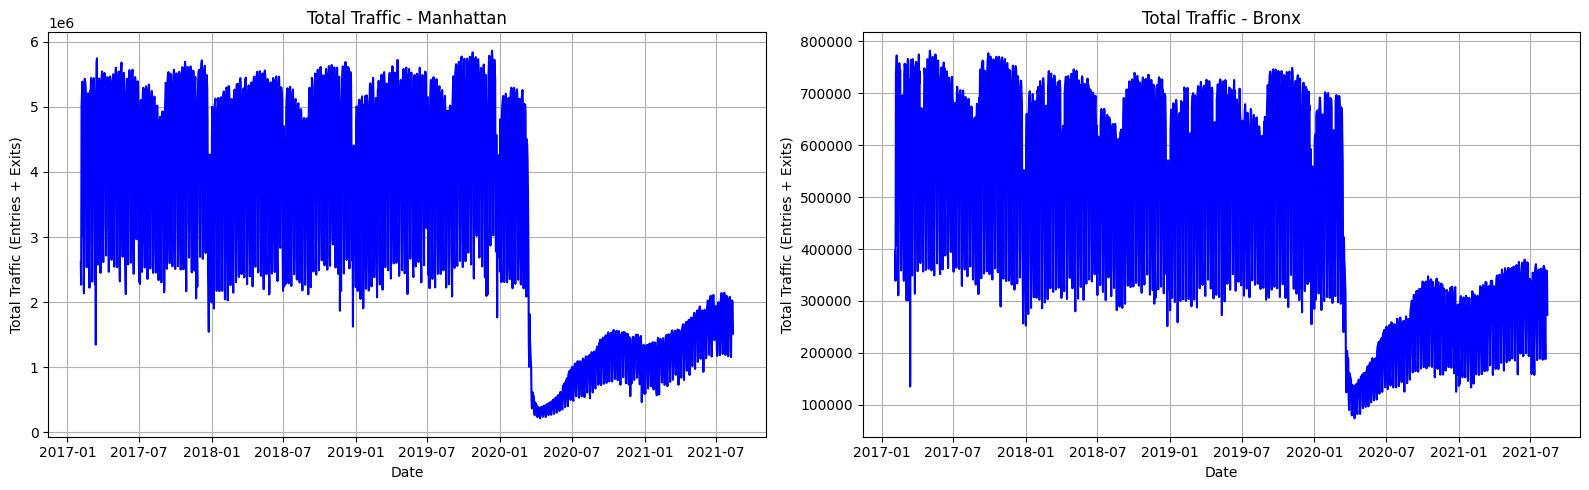

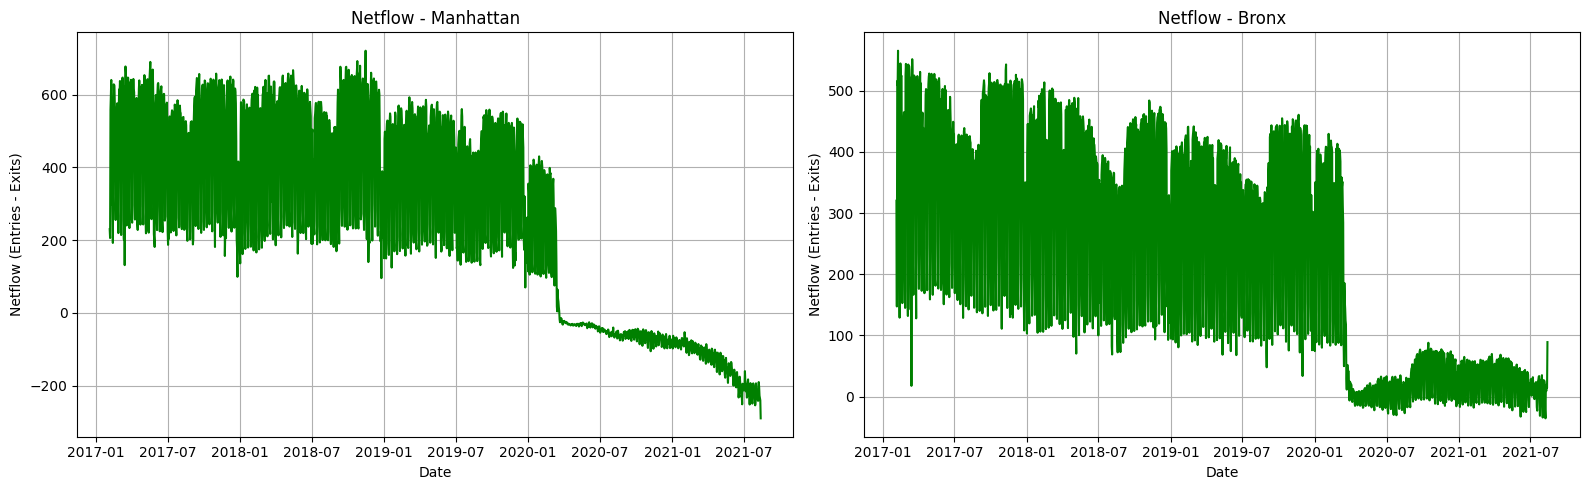

In [8]:
# Ensure Date columns are constructed only once
boroughs = ['M', 'Bx']
names = ['Manhattan','Bronx']

fig_total, axs_total = plt.subplots(1, 2, figsize=(16, 5))
fig_netflow, axs_netflow = plt.subplots(1, 2, figsize=(16, 5))

axs_total = axs_total.flatten()
axs_netflow = axs_netflow.flatten()

for i, borough in enumerate(boroughs):
    filtered_df = filter_by_column(working_df, 'Borough', borough)
    daily_df = aggregate_daily_traffic(filtered_df)
    # monthly_df = aggregate_monthly_traffic(filtered_df)

    # Total vs Date subplot
    # axs_total[i].plot(monthly_df['Date'], monthly_df['Total'], color='blue')
    axs_total[i].plot(daily_df['Date'], daily_df['Total'], color='blue')
    axs_total[i].set_title(f'Total Traffic - {names[i]}')
    axs_total[i].set_xlabel('Date')
    axs_total[i].set_ylabel('Total Traffic (Entries + Exits)')
    axs_total[i].grid(True)

    # Netflow vs Date subplot
    # axs_netflow[i].plot(monthly_df['Date'], monthly_df['Netflow'], color='green')
    axs_netflow[i].plot(daily_df['Date'], daily_df['Netflow'], color='green')
    axs_netflow[i].set_title(f'Netflow - {names[i]}')
    axs_netflow[i].set_xlabel('Date')
    axs_netflow[i].set_ylabel('Netflow (Entries - Exits)')
    axs_netflow[i].grid(True)

# Adjust layout and save
fig_total.tight_layout()
# fig_total.suptitle('Total Traffic by Borough', fontsize=16, y=1.02)
# fig_total.savefig('monthly_total_traffic_by_borough.png', bbox_inches='tight')
fig_total.savefig('daily_total_traffic_by_borough.png', bbox_inches='tight')

fig_netflow.tight_layout()
# fig_netflow.suptitle('Netflow by Borough', fontsize=16, y=1.02)
# fig_netflow.savefig('monthly_netflow_by_borough.png', bbox_inches='tight')
fig_netflow.savefig('daily_netflow_by_borough.png', bbox_inches='tight')

plt.show()
